# Algoritmo de Aprendizaje Automático Basado en Clasificación

[Una introducción al aprendizaje automático con scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

Este cuaderno está inspirado en el libro de Geron: [Hands-on Machine Learning with Scikit-Learn and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) y [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).

---

## Definición de Scikit-learn:

**Aprendizaje supervisado**, en el cual los datos vienen con atributos adicionales que queremos predecir. Este problema puede ser:

- **Clasificación:** las muestras pertenecen a dos o más *clases* y queremos aprender a partir de datos ya etiquetados cómo predecir la clase de los datos no etiquetados.  
  Un ejemplo de problema de clasificación sería el reconocimiento de dígitos escritos a mano, en el cual el objetivo es asignar cada vector de entrada a una de un número finito de categorías discretas. Otra manera de pensar en la clasificación es como una forma *discreta* (en lugar de continua) de aprendizaje supervisado donde se tiene un número limitado de categorías y, para cada una de las `n` muestras proporcionadas, se intenta etiquetarlas con la categoría o clase correcta.

- **Regresión:** si la salida deseada consiste en una o más *variables continuas*, entonces la tarea se llama regresión. Un ejemplo de un problema de regresión sería la predicción de la longitud de un salmón en función de su edad y peso.


**Conjunto de datos MNIST**: un conjunto de 70,000 pequeñas imágenes de dígitos escritos a mano. Puedes leer más en [La Base de Datos MNIST](http://yann.lecun.com/exdb/mnist/).

---


# Descargar MNIST dataset

# Estructura del dataset MNIST

- **MNIST** es un dataset con **70 000 imágenes** de dígitos escritos a mano.  
- Cada imagen tiene un tamaño de **28 × 28 píxeles** en escala de grises.  

## Representaciones posibles:

1. **Forma aplanada (2D):**  
   - Cuando cargamos MNIST en un `DataFrame` o array 2D, cada imagen de 28×28 se aplana en un **vector de 784 valores (28*28 = 784)**.  
   - Resultado: una matriz de **70 000 × 784**.  
     - Filas = imágenes.  
     - Columnas = píxeles.

2. **Forma original (3D):**  
   - Si mantenemos la forma original de las imágenes, el dataset puede representarse como un **tensor de 70 000 × 28 × 28**.  
   - Cada elemento del dataset es una **matriz de 28 × 28**, que corresponde a una imagen.

## Resumen:
- El dataset es un **vector de 70 000 elementos (imágenes)**.  
- Cada elemento es una **matriz de 28 × 28 píxeles**.  
- Para visualizar una imagen con `matplotlib`, normalmente convertimos el vector plano de 784 valores en una matriz 28×28 usando `.reshape(28,28)`.


In [2]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')


In [3]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
len(mnist['data'])

70000

### Visualizacion

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
y = y.astype('float')
y.shape

(70000,)

In [9]:
X.iloc[69999]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 69999, Length: 784, dtype: int64

In [10]:
y[69999]

6.0

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
def viz(n):
    plt.imshow(X.iloc[n].values.reshape(28,28))
    return

In [12]:
viz(69999)

In [13]:
y[1000]

0.0

In [14]:
viz(1000)

---

# Ejercicio

## Localizar el numero 4 y mostrar la imagen

In [15]:
# Aqui me da que es de tipo Serie, lo paso a array de numpy
type(y)

pandas.core.series.Series

In [16]:
y = np.array(y)
type(y)

numpy.ndarray

In [17]:
# Obtenemos todas las posiciones en las que encontramos 4
np.where(y == 4)

(array([    2,     9,    20, ..., 69977, 69987, 69997], dtype=int64),)

In [18]:
_ = X.iloc[69977]
_image = _.values.reshape(28,28)
plt.imshow(_image)

In [19]:
viz(2)

---
---

# Dividir los conjuntos de entrenamiento y prueba

## Metodo 1

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42) 

## Metodo 2

In [21]:
# Por un lado cogemos los 60K primeros valores y por otro los 10K ultimos
num_split = 60000
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

## Mezclando el dataset

Metodo alternativo

# Barajar aleatoriamente el conjunto de entrenamiento

Este bloque de código lo que hace es **barajar aleatoriamente (shuffle) el conjunto de entrenamiento**, 
de manera que las imágenes y sus etiquetas no queden en el mismo orden en que venían originalmente del dataset.

---

## ¿Por qué es importante?
Muchos datasets (como **MNIST**) vienen **ordenados por clases**  
(ejemplo: primero todos los ceros, luego todos los unos, etc.).  

Si no se barajan los datos:
- El modelo podría **aprender sesgos incorrectos**.
- El entrenamiento no sería representativo de la realidad.
- La capacidad de generalización se vería afectada.

---

✅ **Conclusión:**  
Barajar los datos garantiza que el modelo entrene con una mezcla equilibrada y aleatoria de ejemplos, 
evitando patrones artificiales en el orden del dataset.


In [22]:
import numpy as np
shuffle_index = np.random.permutation(num_split)
print(shuffle_index)
X_train, y_train = X_train.iloc[shuffle_index], y_train[shuffle_index]

[24645 48766 33994 ...  5373 16896 13500]


# Entrenando un Clasificador Binario

Para simplificar nuestro problema, haremos de esto un ejercicio de **“cero”** o **“no-cero”**, convirtiéndolo en un problema de dos clases.

Primero necesitamos convertir nuestro objetivo a **0 o no 0**.


In [23]:
y_train_0 = (y_train == 0)
y_train_0

array([ True, False, False, ...,  True, False, False])

In [24]:
y_train[:3]

array([0., 9., 4.])

In [25]:
y_test_0 = (y_test == 0)
y_test_0

array([False, False, False, ..., False, False, False])

En este punto podemos elegir cualquier clasificador y entrenarlo.
Esta es la parte iterativa de elegir y probar todos los clasificadores y ajustar los hiperparámetros

---
---
# SGDClassifier

[SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  
Clasificadores lineales (SVM, regresión logística) con entrenamiento mediante **SGD** (Stochastic Gradient Descent).


## Entrenamiento

In [26]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

SGDClassifier(random_state=0)

## Prediccion

In [27]:
viz(1000)

In [28]:
clf.predict(X.iloc[1000].values.reshape(1, -1))

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [29]:
viz(1001)

In [30]:
clf.predict(X.iloc[1001].values.reshape(1, -1))

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

# Medidas de Rendimiento

## Midiendo la Precisión Usando Validación Cruzada

### StratifiedKFold

Probemos con el muestreo estratificado `StratifiedKFold` para crear múltiples pliegues. En cada iteración, el clasificador se clona y se entrena usando los pliegues de entrenamiento, y hace predicciones en el pliegue de prueba.

StratifiedKFold utiliza el concepto de muestreo estratificado:

- La población se divide en subgrupos homogéneos llamados estratos  
- Se toma el número correcto de instancias de cada estrato  
- Se garantiza que el conjunto de prueba sea representativo de la población  


In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
clf = SGDClassifier(random_state = 0)

In [32]:
skfolds = StratifiedKFold(n_splits = 3, shuffle = False)

In [33]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train.iloc[train_index]
    y_train_folds = (y_train_0[train_index])
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print("{0:.4f}".format(n_correct / len(y_pred)))

0.9865
0.9850
0.9871


# Resumen de Validación Cruzada con StratifiedKFold

- Se utiliza **`StratifiedKFold`** para aplicar validación cruzada estratificada con **3 pliegues**, asegurando que cada pliegue mantenga la misma proporción de clases.  

- En cada iteración:
  - Se generan índices de **entrenamiento** y **prueba**.  
  - Se crea un **clon del clasificador** para entrenarlo desde cero.  
  - Se entrena con el pliegue de entrenamiento y se prueba con el de validación.  
  - Se calcula la **precisión** (proporción de aciertos).  

- Al final se obtienen las precisiones de cada pliegue:

- Estas métricas permiten evaluar el modelo de forma más **robusta y confiable** que usando un único conjunto de prueba.


### `cross_val_score` usando Validación Cruzada K-Fold

La validación cruzada K-fold divide el conjunto de entrenamiento en *K pliegues* y luego realiza predicciones y las evalúa en cada pliegue usando un modelo entrenado en los pliegues restantes.


In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X_train, y_train_0, cv = 3, scoring = 'accuracy')

array([0.9865 , 0.985  , 0.98715])

---
### ⚠️ Peligro de usar ciegamente una métrica de evaluación

A veces una métrica como la *accuracy* puede ser engañosa.  
Vamos a comprobarlo comparando nuestro modelo con un **clasificador tonto**,  
que simplemente predice siempre la clase mayoritaria.


In [35]:
1 - sum(y_train_0) / len(y_train_0)

0.9012833333333333

### ⚠️ Precaución con conjuntos de datos desbalanceados

Una comprobación sencilla muestra que el **90.1 %** de las imágenes **no son el dígito cero**.  
Si simplemente predices que *ninguna imagen es un cero*, tendrás una **exactitud (accuracy) del 90.13 %**,  
¡aunque tu modelo no haya aprendido nada!

👉 **Ten esto en cuenta cuando trabajes con conjuntos de datos desbalanceados.**  
Por esta razón, la *accuracy* **no suele ser la mejor métrica de evaluación** para clasificadores.


---
---
# Matriz de confusion

In [36]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.random.seed(0)
y_train_pred = cross_val_predict(clf, X_train, y_train_0, cv=3)
confusion_matrix(y_train_0, y_train_pred)

array([[53704,   373],
       [  454,  5469]], dtype=int64)

In [37]:
import pandas as pd
pd.DataFrame(confusion_matrix(y_train_0, y_train_pred))
pd.DataFrame(confusion_matrix(y_train_0, y_train_pred),
             columns=pd.MultiIndex.from_product([['Prediction'], ["Negative", "Positive"]]),
             index=pd.MultiIndex.from_product([["Actual"], ["Negative", "Positive"]]))

Prediction         
                  Negative Positive
Actual Negative      53704      373
       Positive        454     5469

In [38]:

5645 / (469 + 5646) # Precision (Classifier)

0.9231398201144726

In [39]:
5645 / (276 + 5646) # Recall (Actual)

0.9532252617359

---
# Precision

### Precisión (Precision)

**Precisión** mide la exactitud de las predicciones positivas.  
También se conoce como la *precisión del clasificador*.

$$
Precisión = \frac{Verdaderos\ Positivos}{Verdaderos\ Positivos + Falsos\ Positivos}
$$

- **Verdaderos Positivos (TP):** predicciones positivas correctas.  
- **Falsos Positivos (FP):** predicciones positivas incorrectas.  

La precisión indica **qué proporción de las predicciones positivas fueron correctas**.


In [40]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0, y_train_pred) 

0.9361520027387881

### Recall (Sensibilidad)

La *precisión* (Precision) normalmente se utiliza junto con el **recall**,  
también llamado **Sensibilidad** o **Tasa de Verdaderos Positivos**.

El *recall* mide la **proporción de instancias positivas que son correctamente detectadas** por el clasificador.

$$
Recall = \frac{Verdaderos\ Positivos}{Verdaderos\ Positivos + Falsos\ Negativos}
$$

- **Verdaderos Positivos (TP):** positivos correctamente identificados.  
- **Falsos Negativos (FN):** positivos que el modelo no detectó.


In [41]:
recall_score(y_train_0, y_train_pred) 

0.923349653891609

### F1 Score

El **F1-score** es la **media armónica** entre la *Precisión (Precision)* y el *Recall (Sensibilidad)*.  
A diferencia de la media aritmética, la **media armónica da más peso a los valores bajos**,  
por lo que el F1 solo será alto si **ambas métricas son altas**.

$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

$$
F1 = \left( \frac{1}{2} \left( \frac{1}{Precision} + \frac{1}{Recall} \right) \right)^{-1}
$$

$$
F1 = \frac{2 \times TP}{2 \times TP + FP + FN}
$$

El F1-score combina *precision* y *recall* en una sola medida,  
resultando especialmente útil cuando trabajamos con **conjuntos de datos desbalanceados**.


In [42]:
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.9297067573310667

---
### Compromiso entre Precisión y Recall (Precision / Recall Tradeoff)

Aumentar la **Precisión** suele reducir el **Recall**, y viceversa.

Esto ocurre porque muchos clasificadores se basan en un **umbral de decisión** para determinar si una instancia es positiva o negativa.  
Ajustar ese umbral cambia el equilibrio entre ambas métricas:

- Umbral alto → **mayor Precisión**, **menor Recall**.  
- Umbral bajo → **mayor Recall**, **menor Precisión**.

Este equilibrio inverso se conoce como **Precision–Recall Tradeoff**.

$$
\text{Al\ aumentar\ la\ Precisión} \ \Rightarrow \ \text{disminuye\ el\ Recall}
$$

$$
\text{Al\ aumentar\ el\ Recall} \ \Rightarrow \ \text{disminuye\ la\ Precisión}
$$


### 🎯 Efecto del Umbral de Decisión sobre Precisión y Recall

Supongamos que tenemos **12 observaciones** y queremos detectar el dígito **0**.  
Dependiendo de dónde fijemos el **umbral de decisión**, cambian los valores de **Precisión** y **Recall**.

---

#### 🏹 Flecha Central

- **Verdaderos Positivos (TP):** 4  
- **Falsos Positivos (FP):** 1  

$$
Precisión = \frac{4}{4 + 1} = 0.8 = 80\%
$$

De los **6 ceros reales**, el clasificador detectó **4**:

$$
Recall = \frac{4}{6} = 0.67 = 67\%
$$

---

#### ➡️ Flecha Derecha

- **Verdaderos Positivos (TP):** 3  
- **Falsos Positivos (FP):** 0  

$$
Precisión = \frac{3}{3 + 0} = 1.0 = 100\%
$$

De los **6 ceros reales**, el clasificador detectó **3**:

$$
Recall = \frac{3}{6} = 0.5 = 50\%
$$

---

#### ⬅️ Flecha Izquierda

- **Verdaderos Positivos (TP):** 6  
- **Falsos Positivos (FP):** 2  

$$
Precisión = \frac{6}{6 + 2} = 0.75 = 75\%
$$

El clasificador detectó **todos los ceros reales**:

$$
Recall = \frac{6}{6} = 1.0 = 100\%
$$


In [43]:
np.random.seed(0)
clf = SGDClassifier(random_state=0)
clf.fit(X_train, y_train_0)

y[1000]

0.0

In [44]:
y_scores = clf.decision_function([X.iloc[1000]])
y_scores

c:\Users\PcVIP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([8290.36685778])

In [45]:
y[1001]

7.0

In [46]:
threshold = 0
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([ True])

In [47]:
threshold = 40000
y_some_digits_pred = (y_scores > threshold)
y_some_digits_pred

array([False])

In [48]:
y_scores = cross_val_predict(clf, X_train, y_train_0, cv=3, method='decision_function')

In [49]:

plt.figure(figsize=(12,8)); plt.hist(y_scores, bins=100)

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00, 2.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 5.000e+00,
        6.000e+00, 5.000e+00, 1.400e+01, 1.800e+01, 1.600e+01, 2.000e+01,
        1.300e+01, 2.800e+01, 3.800e+01, 3.600e+01, 4.900e+01, 6.500e+01,
        8.400e+01, 7.300e+01, 1.010e+02, 1.350e+02, 1.280e+02, 1.850e+02,
        1.990e+02, 2.800e+02, 2.930e+02, 3.530e+02, 4.260e+02, 5.060e+02,
        5.120e+02, 6.590e+02, 7.250e+02, 8.070e+02, 9.340e+02, 1.080e+03,
        1.148e+03, 1.352e+03, 1.481e+03, 1.669e+03, 1.947e+03, 2.108e+03,
        2.284e+03, 2.449e+03, 2.656e+03, 2.899e+03, 2.873e+03, 2.950e+03,
        3.047e+03, 2.924e+03, 2.829e+03, 2.605e+03, 2.196e+03, 1.801e+03,
        1.440e+03, 1.136e+03, 8.880e+02, 5.900e+02, 4.510e+02, 3.610e+02,
        3.170e+02, 3.090e+02, 3.580e+02, 4.040e+02, 4.260e+02, 4.110e+02,
        4.610e+02, 3.720e+02, 3.510e+0

### Cálculo de Precisión y Recall para todos los Umbrales

Con los valores de decisión (`decision_function`), podemos obtener la curva de **Precisión-Recall**:


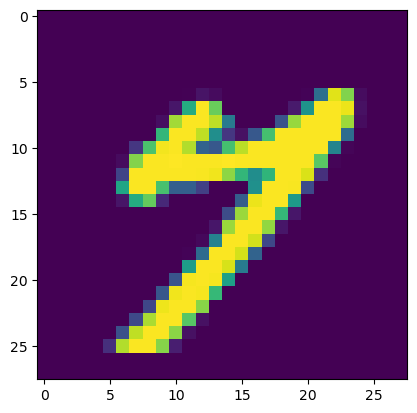

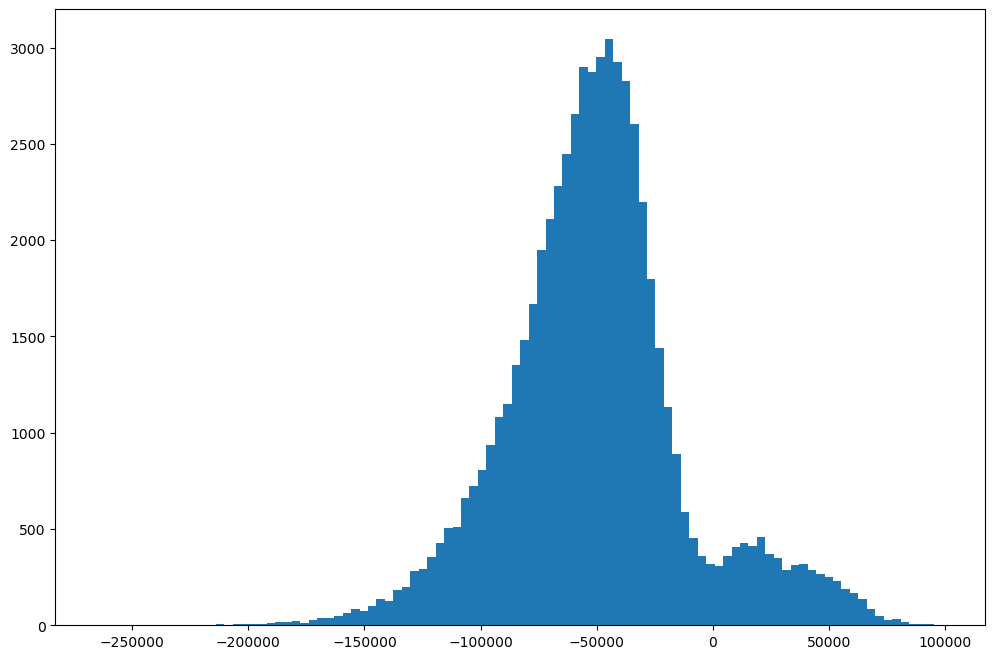

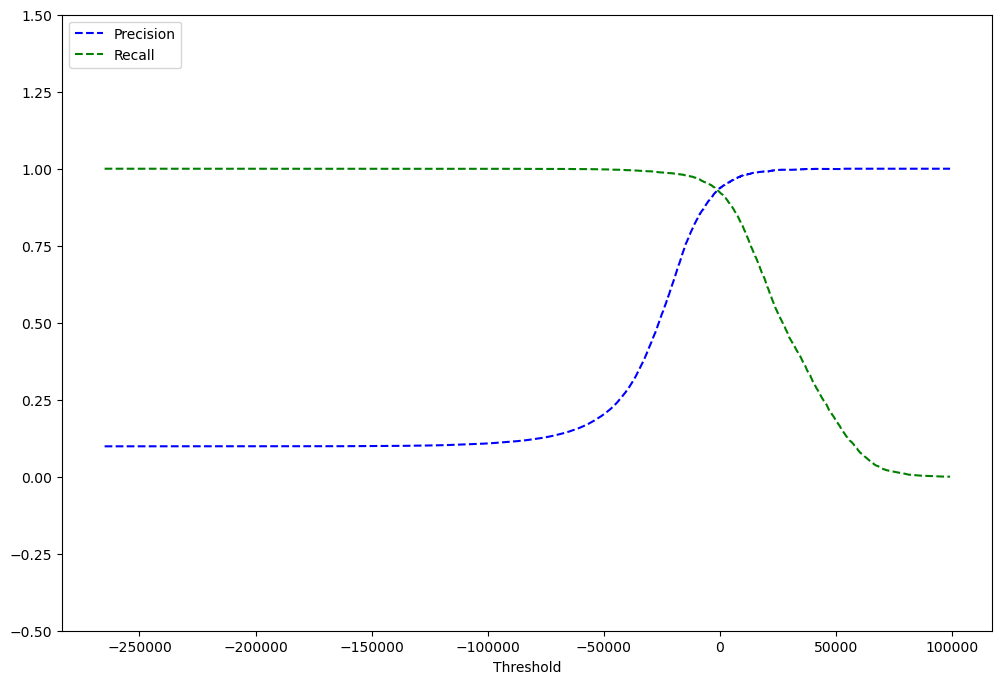

In [50]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])    

plt.figure(figsize=(12,8)); 
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### Selección del Umbral según la Curva de Precisión y Recall

Con este gráfico, podemos seleccionar el valor de **umbral (threshold)** que ofrece el mejor equilibrio entre **precisión** y **recall** según la naturaleza del problema.

- **Alta precisión:** preferimos cometer pocos falsos positivos.  
  Ejemplo: diseñar un clasificador que detecte contenido adulto para proteger a menores.  
  En este caso, se establece un **umbral alto**, permitiendo solo predicciones muy seguras como positivas.

- **Alto recall:** preferimos no pasar por alto verdaderos positivos, aunque aumenten los falsos positivos.  
  Ejemplo: detección de ladrones o intrusos en imágenes de seguridad, donde es mejor "exagerar" en la detección.

Una manera útil de visualizar este equilibrio es trazando la **curva de Precisión vs Recall**, la cual muestra cómo varían ambas métricas al ajustar el umbral de decisión.


In [51]:
plt.figure(figsize=(12,8))
plt.plot(precisions, recalls)
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('PR Curve: precisions/recalls tradeoff')

Text(0.5, 1.0, 'PR Curve: precisions/recalls tradeoff')

---
### Curva ROC (Receiver Operating Characteristics)

La **curva ROC** se utiliza para evaluar el rendimiento de un clasificador binario.  
En lugar de graficar *Precisión vs Recall*, la ROC representa:

- En el eje **Y**: la **tasa de verdaderos positivos (TPR)**, también llamada **Recall** o **Sensibilidad**.  
- En el eje **X**: la **tasa de falsos positivos (FPR)**, que mide cuántas instancias negativas fueron clasificadas incorrectamente como positivas.

$$
TPR = \frac{TP}{TP + FN}
$$

$$
FPR = \frac{FP}{FP + TN}
$$

La **tasa de verdaderos negativos (TNR)** se define como:

$$
TNR = \frac{TN}{FP + TN}
$$

y también se conoce como **especificidad (specificity)**.

Por lo tanto, la curva ROC traza:

$$
Sensibilidad\ (Recall)\quad \text{vs} \quad 1 - Especificidad
$$


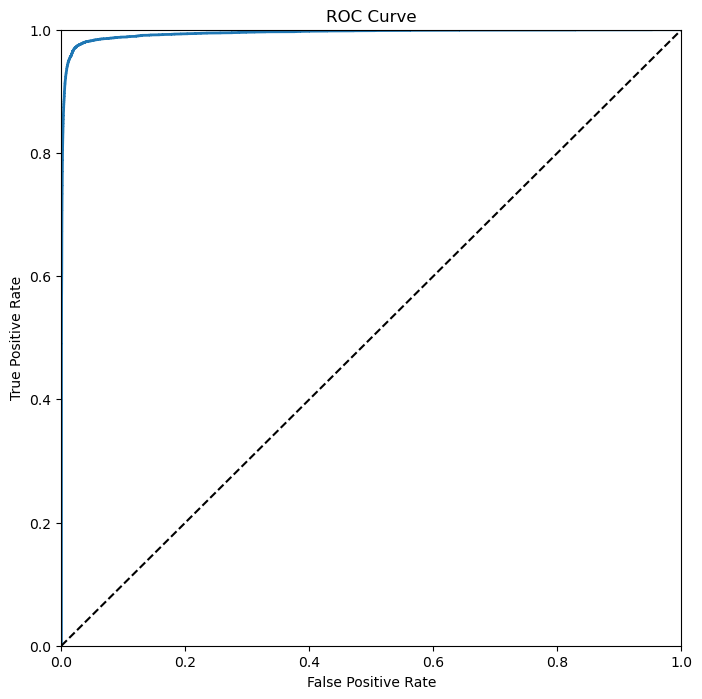

In [54]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

plt.figure(figsize=(8,8))
plot_roc_curve(fpr, tpr)
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.9945402356169668

### ¿Cuándo usar la curva PR y cuándo usar la curva ROC?

- Usa la **curva PR (Precisión–Recall)** cuando:
  - La clase **positiva es rara** (pocos ejemplos positivos en comparación con los negativos).
  - Te interesa más **evitar falsos positivos** (por ejemplo, clasificación de spam, detección de contenido sensible, etc.).

- Usa la **curva ROC** cuando:
  - La clase **negativa es rara**.
  - Te interesa más **evitar falsos negativos** (por ejemplo, diagnóstico médico o detección de intrusos).

> En el ejemplo anterior, la **curva ROC** sugería que el clasificador era bueno.  
> Sin embargo, al observar la **curva PR**, se aprecia que aún existe **margen de mejora** en la relación entre precisión y recall.


## Model Comparison — Random Forest

### Random Forest Classifier

Un **Random Forest** es un conjunto (ensamble) de muchos **árboles de decisión** entrenados sobre subconjuntos aleatorios de los datos y de las características.  
Cada árbol realiza una predicción, y el bosque decide por **votación mayoritaria** (para clasificación) o **promedio** (para regresión).

Este método reduce el **overfitting** característico de los árboles individuales y mejora la **precisión y estabilidad** del modelo.

**Ventajas:**
- Robusto ante ruido y sobreajuste.  
- Maneja datos no lineales y características correlacionadas.  
- Proporciona medidas de importancia de características (*feature importance*).

**Desventajas:**
- Menos interpretable que un solo árbol.  
- Entrenamiento más lento en grandes datasets.

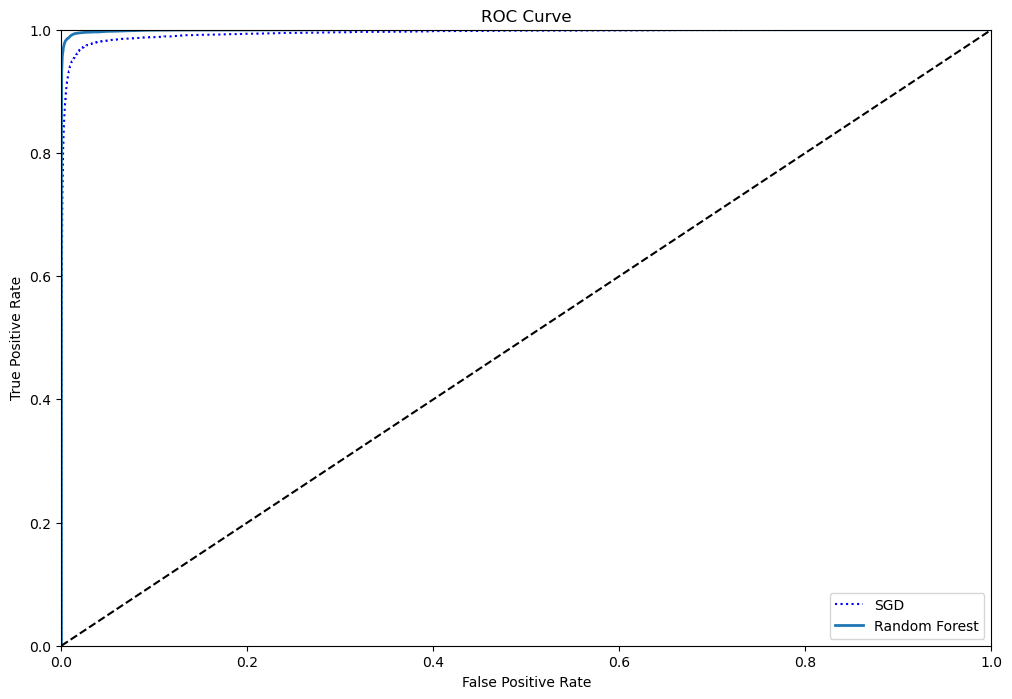

In [56]:
from sklearn.ensemble import RandomForestClassifier
f_clf = RandomForestClassifier(random_state=0, n_estimators=100)
y_probas_forest = cross_val_predict(f_clf, X_train, y_train_0,
                                    cv=3, method='predict_proba')
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_0, y_scores_forest)

plt.figure(figsize=(12,8)) 
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [57]:
roc_auc_score(y_train_0, y_scores_forest)

0.9994200121174004

In [58]:
f_clf.fit(X_train, y_train_0)

RandomForestClassifier(random_state=0)

In [59]:
y_train_rf = cross_val_predict(f_clf, X_train, y_train_0, cv=3)
precision_score(y_train_0, y_train_rf) 

0.9929165928811758

In [60]:
recall_score(y_train_0, y_train_rf) 

0.9466486577747762

In [61]:
confusion_matrix(y_train_0, y_train_rf)

array([[54037,    40],
       [  316,  5607]], dtype=int64)